# Microsoft Movie Analysis

**Authors:** Elena Burlando


## Overview

The objective of this project is to analyze movie data to provide insights on movie types that have performed best in the past decade. 

As an outcome of this analysis we are hoping to get: 
* Produced: 
 * Top 10 most produced genres during 2010-2020 (by entry count).
 * Top 2 most produced genres for each year (by entry count).
* Popularity: 
 * Top 10 most popular movies and genres during 2010-2019 (by number of votes). 
* Rating:
 * Top 10 highest rated genres during 2010-2019.
 * Top 10 highest rated movies during 2010-2019. 
 * Correlation between ratings and number of votes. 
* Gross Income and ROI:
 * Movies/genres with the highest domestic gross income. 
 * Movies/genres with the highest foreign gross income.
 * Movies/genres with the highest worldwide gross income. 
 * Correlation between domestic and foreign gross income.
 * Movies/genres with the highest ROI (return on investment). 



## Business Problem

Microsoft following the success of other big tech companies is considering setting up a movie studio. This project is aiming to provide valuable information to the head of Microsoft's new movie department in the areas of movies, genres, and ROI. 

***
One of the main business pain points related to this project is lack of experince in the movie industry and using 
data from other sources since it doesn't have any of its own. I picked the questions above as I think the answers to those would be the most beneficial when starting from scratch. They will provide high level overview of the industry and trends. 
***

## Data Understanding

For this project we will be using data from: 
* [IMDB](https://www.imdb.com/)
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [The Numbers](https://www.the-numbers.com/)

Variables included: movie titles, release year, genres, runtime minutes, ratings, number of votes, and gross income (domestic and foreign) made of movies from 2010 through 2020.
***
* Using these sources we would be able to answer our questions listed above. 
* The target variables are the top performing movie titles and genres. 
* We intend to use max and mean of variables, and Pearson correlation. 
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### During Data Understanding stage we will read and preview our data sources. 
*** 
We will be using these methods for each dataset:
* .read_csv()
* .shape() 
* .info()
* .describe()
***

## imdb_title_basics dataset

In [2]:
imdb_title_basics=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
imdb_title_basics.shape

(146144, 6)

In [4]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


*** 
#### Data Cleaning tasks for imdb_title_basics: 
* 'original_title' has 21 null values
* 'runtime_minutes' has 31,739 null values 
* 'genres' has 5,408 null values
***

## imdb_title_ratings dataset


In [6]:
imdb_title_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
imdb_title_ratings.shape

(73856, 3)

In [8]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


***
#### Data Cleaning tasks for imdb_title_ratings: 
* none
***

## bom_movie_gross dataset


In [10]:
bom_movie_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
bom_movie_gross.shape

(3387, 5)

In [12]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
# Descibe method needs to be rerun in data cleaning stage after converting column 'foregn_gross' to float. 
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


***
#### Data Cleaning tasks for bom_movie_gross: 
    * 'studio' has 5 null values
    * 'domestic_gross' has 28 null values
    * 'foreign_gross' has 1,350 null values and needs to be converted to float
***

## tn_movie_budgets dataset

In [14]:
tn_movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
tn_movie_budgets.shape

(5782, 6)

In [16]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [17]:
# needs to rerun it after cleaning up data. We will convert columns: production_budget, domestic_gross, and 
# worldwide_gross to floats.  
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


***
#### Data Cleaning tasks for tn_movie_budgets: 
    * 'production_budget' needs to be converted to float
    * 'domestic_gross' needs to be converted to float
    * 'worldwide_gross' needs to be converted to float
***

## Data Preparation
***
Following steps: 
* .info() method
* Null values
* Check on dublicates
* Check on outliers
***

### Data Preparation: imdb_title_basics dataset
***
According to our previous note 'Data Cleaning tasks for imdb_title_basics':
* 'original_title' has 21 null values
* 'runtime_minutes' has 31,739 null values
* 'genres' has 5,408 null values
* check on dublicates
* check on outliers

Since 'primary_title' doesn't have any missing values, we will ignore null values of 'original_title' and keep them as is.

We will convert null values of 'runtime minutes' to mean value, but we won't be using this data for this project.

'genres' column is missing 5,408 out of 146,144 values. This is equavalent to 3.5%. Since we are trying to figure out the top genres produced by count, we will drop null values. 
***

In [18]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [20]:
imdb_title_basics.runtime_minutes.fillna(imdb_title_basics.runtime_minutes.mean(), inplace=True)

In [21]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [23]:
imdb_title_basics = imdb_title_basics[imdb_title_basics['genres'].notna()]
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,86.187247,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy


In [24]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [25]:
imdb_title_basics_dublicates = imdb_title_basics[imdb_title_basics.duplicated()]
print(len(imdb_title_basics_dublicates))
imdb_title_basics_dublicates.head()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [26]:
imdb_title_basics.start_year.unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2026, 2025, 2115, 2027, 2024])

In [27]:
imdb_title_basics.start_year.value_counts()

2017    16816
2016    16353
2018    16293
2015    15569
2014    15095
2013    14298
2012    13356
2011    12432
2010    11452
2019     8058
2020      900
2021       83
2022       23
2023        3
2027        1
2026        1
2024        1
2025        1
2115        1
Name: start_year, dtype: int64

In [28]:
imdb_title_basics = imdb_title_basics[imdb_title_basics.start_year <= 2020]
imdb_title_basics[imdb_title_basics.start_year > 2020]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [29]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140622 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140622 non-null  object 
 1   primary_title    140622 non-null  object 
 2   original_title   140620 non-null  object 
 3   start_year       140622 non-null  int64  
 4   runtime_minutes  140622 non-null  float64
 5   genres           140622 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


## Merginng two dataframes: imdb_title_basics and imdb_title_ratings on common column 'tconst'. 
It will be easier to parse through information once two dfs are combined. 

In [30]:
imdb_title_raiting_basics_df = imdb_title_basics.merge(imdb_title_ratings, on="tconst", how="inner")
imdb_title_raiting_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119


In [31]:
imdb_title_raiting_basics_df.shape

(73052, 8)

In [32]:
imdb_title_raiting_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [33]:
#basic stats
imdb_title_raiting_basics_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73052.000000,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,93.874636,6.330930,3.562173e+03
std,2.615288,198.608438,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,5.000000e+01
75%,2017.000000,102.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [34]:
#df with over 100 reviews per movie to check on correlation between numvotes and averagerating.
imdb_df_over_100_votes = imdb_title_raiting_basics_df.loc[imdb_title_raiting_basics_df['numvotes'] > 100]
imdb_df_over_100_votes

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
...,...,...,...,...,...,...,...,...
73037,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
73038,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
73039,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
73046,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


## Data Preparation:  bom_movie_gross dataset

In [35]:
bom_movie_gross_dropped_na = bom_movie_gross.dropna()

In [36]:
bom_movie_gross_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [37]:
bom_movie_gross_dropped_na.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [38]:
bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].str.replace(',', '', regex=True)

<ipython-input-38-b3c99fdef75b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].str.replace(',', '', regex=True)


In [39]:
bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].astype(float)

<ipython-input-39-005ff372db55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].astype(float)


In [40]:
bom_movie_gross_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [41]:
bom_movie_gross_dropped_na.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [42]:
bom_movie_gross_dropped_na['worldwide_gross'] = bom_movie_gross_dropped_na.domestic_gross + \
bom_movie_gross_dropped_na.foreign_gross
bom_movie_gross_dropped_na.head()

<ipython-input-42-f1eb01f1967e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['worldwide_gross'] = bom_movie_gross_dropped_na.domestic_gross + \


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [43]:
# check for extraneous values in 'domestic_gross'
bom_movie_gross_dropped_na.domestic_gross.value_counts()

1500000.0     14
1000000.0     13
1300000.0     12
1100000.0     11
1600000.0     10
              ..
64300000.0     1
41100000.0     1
46400000.0     1
677000.0       1
45900000.0     1
Name: domestic_gross, Length: 1295, dtype: int64

In [44]:
# check for extraneous values in 'foregn_gross'
bom_movie_gross_dropped_na.foreign_gross.value_counts()

1200000.0      23
1100000.0      13
4200000.0      12
1900000.0      11
2500000.0      11
               ..
57000000.0      1
186000.0        1
44000000.0      1
204400000.0     1
128000.0        1
Name: foreign_gross, Length: 1193, dtype: int64

## Merging bom_movie_gross and imdb_title_raiting_basics_df

In [111]:
bom_movie_gross_dropped_na.rename(columns={'title':'original_title'}, inplace=True)
bom_movie_gross_dropped_na.head()

/Users/elenaburlando/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,original_title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [112]:
#merging bom_movie_gross and imdb_title_raiting_basics_df
imdb_title_raiting_basics_gross_df = imdb_title_raiting_basics_df.merge(bom_movie_gross_dropped_na, on="original_title", \
                                                                        how="inner")
imdb_title_raiting_basics_gross_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012,8744000.0
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012,8744000.0
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012,8744000.0
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013,188100000.0
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,2014,53200000.0


In [113]:
imdb_title_raiting_basics_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 1550
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1551 non-null   object 
 1   primary_title    1551 non-null   object 
 2   original_title   1551 non-null   object 
 3   start_year       1551 non-null   int64  
 4   runtime_minutes  1551 non-null   float64
 5   genres           1551 non-null   object 
 6   averagerating    1551 non-null   float64
 7   numvotes         1551 non-null   int64  
 8   studio           1551 non-null   object 
 9   domestic_gross   1551 non-null   float64
 10  foreign_gross    1551 non-null   float64
 11  year             1551 non-null   int64  
 12  worldwide_gross  1551 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 169.6+ KB


### Data Preparation: tn_movie_budgets

In [48]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [49]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [50]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '', regex=True)

In [51]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '', regex=True)

In [52]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(float)

In [53]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [54]:
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '', regex=True)

In [55]:
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '', regex=True)

In [56]:
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype(float)

In [57]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '', regex=True)

In [58]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '', regex=True)

In [59]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype(float)

In [60]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [61]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [62]:
# check on dublicates
tn_movie_budgets_dublicates = tn_movie_budgets[tn_movie_budgets.duplicated()]
print(len(tn_movie_budgets_dublicates))
tn_movie_budgets_dublicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [63]:
tn_movie_budgets.worldwide_gross.value_counts()

0.0            367
8000000.0        9
7000000.0        6
2000000.0        6
9000000.0        4
              ... 
18524496.0       1
85632458.0       1
527079962.0      1
261443242.0      1
124827316.0      1
Name: worldwide_gross, Length: 5356, dtype: int64

In [64]:
tn_movie_budgets.production_budget.value_counts()

20000000.0     231
10000000.0     212
30000000.0     177
15000000.0     173
25000000.0     171
              ... 
87500000.0       1
187500000.0      1
91000000.0       1
5100000.0        1
151000000.0      1
Name: production_budget, Length: 509, dtype: int64

In [65]:
tn_movie_budgets.domestic_gross.value_counts()

0.0            548
8000000.0        9
2000000.0        7
7000000.0        7
10000000.0       6
              ... 
68856263.0       1
24474312.0       1
30059386.0       1
101363301.0      1
8355815.0        1
Name: domestic_gross, Length: 5164, dtype: int64

In [66]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [67]:
# replacing 0.0 value in 'domestic_gross' with mean
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].replace({0.0: 4.187333e+07})


In [68]:
tn_movie_budgets.domestic_gross.value_counts()

41873330.0    548
8000000.0       9
7000000.0       7
2000000.0       7
10000000.0      6
             ... 
568932.0        1
68856263.0      1
24474312.0      1
30059386.0      1
65011757.0      1
Name: domestic_gross, Length: 5164, dtype: int64

In [69]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.584195e+07,9.148746e+07
std,28.821076,4.181208e+07,6.689408e+07,1.747200e+08
min,1.000000,1.100000e+03,3.880000e+02,0.000000e+00
25%,25.000000,5.000000e+06,5.609102e+06,4.125415e+06
50%,50.000000,1.700000e+07,2.768800e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [70]:
# replacing 0.0 value in 'worldwide_gross' with mean
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace({0.0: 9.148746e+07})

In [71]:
tn_movie_budgets['worldwide_gross'].value_counts()

91487460.0     367
8000000.0        9
7000000.0        6
2000000.0        6
10000000.0       4
              ... 
18524496.0       1
85632458.0       1
527079962.0      1
261443242.0      1
7680.0           1
Name: worldwide_gross, Length: 5356, dtype: int64

In [72]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.584195e+07,9.729443e+07
std,28.821076,4.181208e+07,6.689408e+07,1.730953e+08
min,1.000000,1.100000e+03,3.880000e+02,2.600000e+01
25%,25.000000,5.000000e+06,5.609102e+06,8.210838e+06
50%,50.000000,1.700000e+07,2.768800e+07,3.863768e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [73]:
tn_movie_budgets['foreign_gross'] = tn_movie_budgets.worldwide_gross - tn_movie_budgets.domestic_gross

In [74]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


In [75]:
tn_movie_budgets['ROI'] = tn_movie_budgets.worldwide_gross - tn_movie_budgets.production_budget
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08


### Merging tn_movie_budgets and imdb_title_raiting_basics_db
To answer questions on Gross Income and ROI

In [76]:
# Rename 'movie' column
tn_movie_budgets.rename(columns={'movie':'primary_title'}, inplace=True)
tn_movie_budgets.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08


In [77]:
# Drop columns 'id' and 'release_date'
tn_movie_budgets_df = tn_movie_budgets.drop(['id', 'release_date'], axis=1)
tn_movie_budgets_df.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08


In [78]:
imdb_title_raiting_budgets_df = imdb_title_raiting_basics_df.merge(tn_movie_budgets_df, on="primary_title", how="inner")
imdb_title_raiting_budgets_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,45000000.0,41873330.0,73706.0,-41799624.0,-44926294.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,25000000.0,720828.0,9313302.0,8592474.0,-15686698.0
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,25000000.0,720828.0,9313302.0,8592474.0,-15686698.0
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,25000000.0,720828.0,9313302.0,8592474.0,-15686698.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000.0,58236838.0,187861183.0,129624345.0,96861183.0


In [79]:
imdb_title_raiting_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2867 non-null   object 
 1   primary_title      2867 non-null   object 
 2   original_title     2867 non-null   object 
 3   start_year         2867 non-null   int64  
 4   runtime_minutes    2867 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2867 non-null   float64
 7   numvotes           2867 non-null   int64  
 8   production_budget  2867 non-null   float64
 9   domestic_gross     2867 non-null   float64
 10  worldwide_gross    2867 non-null   float64
 11  foreign_gross      2867 non-null   float64
 12  ROI                2867 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 313.6+ KB


## Data Modeling
***
We grouped our questions by four categories: 
* Produced
* Popularity
* Rating
* Gross Income and ROI


## PRODUCED

### Question 1 & 2
***
We will start by finding the answers for Questions 1 and 2. To answer these questions we only need the first dataset: imdb_title_basics. 
* Top 10 most produced genres during 2010-2020 (by entry count).
* Top 2 most produced genres for each year (by entry count).
***

In [80]:
most_produced = imdb_title_basics.genres.value_counts()
most_produced.iloc[:10]

Documentary              32181
Drama                    21474
Comedy                    9174
Horror                    4368
Comedy,Drama              3517
Thriller                  3045
Action                    2207
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

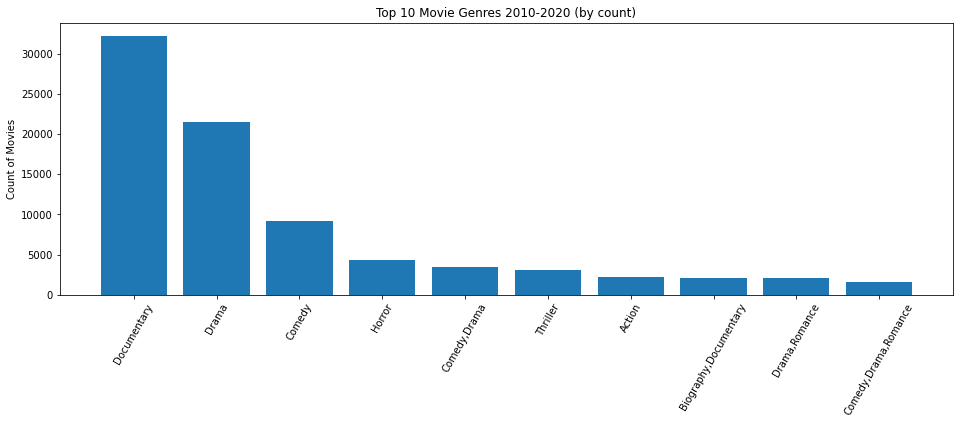

In [81]:
# Set up plots
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
top_10_counts = most_produced.iloc[:10]

# Plot data
ax.bar(top_10_counts.index, top_10_counts.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=60)
ax.set_ylabel("Count of Movies")
ax.set_title("Top 10 Movie Genres 2010-2020 (by count)");

### Q2: Top two most produced genres for each year (by entry count)

In [82]:
top_produced_by_each_year = imdb_title_basics[['start_year', 'genres']].copy()
top_produced_by_each_year.head()

,start_year,genres
0,2013,"Action,Crime,Drama"
1,2019,"Biography,Drama"
2,2018,Drama
3,2018,"Comedy,Drama"
4,2017,"Comedy,Drama,Fantasy"


In [83]:
top_produced_by_each_year = top_produced_by_each_year.set_index('start_year')
top_produced_by_each_year.head()

,genres
start_year,
2013,"Action,Crime,Drama"
2019,"Biography,Drama"
2018,Drama
2018,"Comedy,Drama"
2017,"Comedy,Drama,Fantasy"


In [84]:
top_produced_by_each_year_df = top_produced_by_each_year.groupby(['start_year'])
top_produced_by_each_year_df.head()

,genres
start_year,
2013,"Action,Crime,Drama"
2019,"Biography,Drama"
2018,Drama
2018,"Comedy,Drama"
2017,"Comedy,Drama,Fantasy"
2018,Comedy
2017,"Horror,Thriller"
2017,"Adventure,Animation,Comedy"
2012,"Documentary,History"


In [85]:
top_prod_by_year = top_produced_by_each_year_df.apply(lambda x: x.value_counts(["genres"]))
top_prod_by_year

start_year  genres               
2010        Documentary              2507
            Drama                    1812
            Comedy                    738
            Comedy,Drama              298
            Horror                    283
                                     ... 
2020        Comedy,Crime                1
            Comedy,Crime,Horror         1
            Comedy,Crime,Mystery        1
            Romance,Thriller            1
            Biography,Drama,Sport       1
Length: 5787, dtype: int64

In [86]:
top_two_prod_by_year = top_prod_by_year.groupby('start_year').head(2)
top_two_prod_by_year

start_year  genres     
2010        Documentary    2507
            Drama          1812
2011        Documentary    2649
            Drama          1909
2012        Documentary    2721
            Drama          2045
2013        Documentary    2561
            Drama          1941
2014        Documentary    2805
            Drama          1980
2015        Documentary    3836
            Drama          2228
2016        Documentary    4405
            Drama          2423
2017        Documentary    4644
            Drama          2652
2018        Documentary    4196
            Drama          2867
2019        Documentary    1782
            Drama          1449
2020        Drama           168
            Comedy           78
dtype: int64

### Conclusion on Questions 1 & 2
***
The most produced genres for a decade of 2010-2020 and annually during this period are: Documentary and Drama. 
***

## POPULARITY

## Question 3: Top 10 most popular movies & genres during 2010-2019 (by number of votes).

In [87]:
# Top 10 rated movies in 2010-2019 based on the max number of votes
imdb_numvotes = imdb_title_raiting_basics_df.groupby(['genres']).max().sort_values('numvotes', ascending=False)
imdb_numvotes.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
genres,,,,,,,
"Action,Adventure,Sci-Fi",tt9301884,Zombie Ninjas vs Black Ops,Zombie Ninjas vs Black Ops,2019,181.0,9.0,1841066
"Action,Thriller",tt9479454,Zombies Have Fallen,À l'aveugle,2019,183.0,8.5,1387769
"Adventure,Drama,Sci-Fi",tt7853292,The V: Sacrifice of the Constellations,The V: Sacrifice of the Constellations,2019,169.0,9.2,1299334
"Drama,Western",tt9144530,Walden: Life in The Woods,Walden: Life in The Woods,2018,165.0,8.9,1211405
"Biography,Crime,Drama",tt8553134,Winnerz,Winnerz,2019,180.0,8.5,1035358
"Mystery,Thriller",tt9793334,[Un]Righteous Men,[Un]Righteous Men,2019,150.0,8.5,1005960
"Action,Adventure,Comedy",tt9726638,Zoombies 2,Zoombies 2,2019,310.0,8.9,948394
"Action,Adventure,Fantasy",tt9129500,Wrath of the Titans,Za granyu realnosti,2019,183.0,8.0,784780
"Drama,Mystery,Thriller",tt9552162,Çocuklar Sana Emanet,Çocuklar Sana Emanet,2019,149.0,8.6,761592


In [88]:
# Top 10 most popular genres associated with most popular movies based on number of votes.
imdb_numvotes.numvotes.iloc[:10]

genres
Action,Adventure,Sci-Fi     1841066
Action,Thriller             1387769
Adventure,Drama,Sci-Fi      1299334
Drama,Western               1211405
Biography,Crime,Drama       1035358
Mystery,Thriller            1005960
Action,Adventure,Comedy      948394
Action,Adventure,Fantasy     784780
Drama,Mystery,Thriller       761592
Adventure,Family,Fantasy     719629
Name: numvotes, dtype: int64

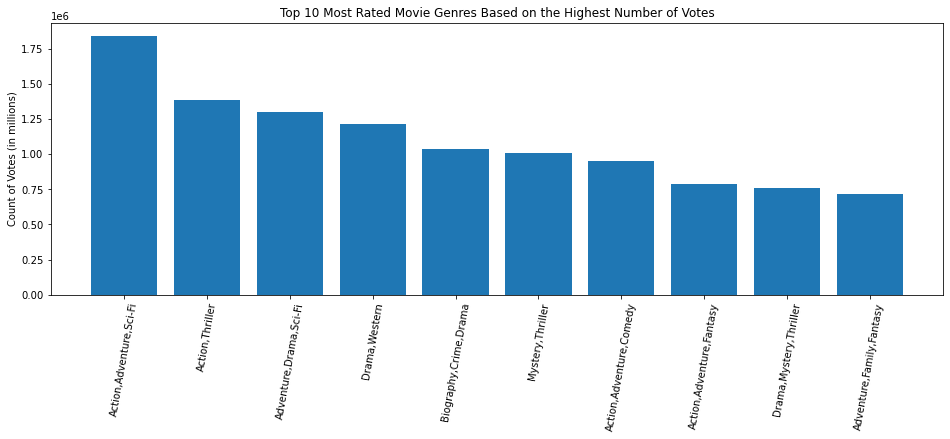

In [89]:
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_numvotes.numvotes
top_10_numvotes = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_numvotes.index, top_10_numvotes.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Count of Votes (in millions)")
ax.set_title("Top 10 Most Rated Movie Genres Based on the Highest Number of Votes");

In [90]:
#Most popular movie genres in 2010-2019 based on Average number of votes
imdb_numvotes_mean = imdb_title_raiting_basics_df.groupby(['genres']).mean().sort_values('numvotes', ascending=False)
imdb_numvotes_mean.iloc[:10]

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Action,Adventure,Sci-Fi",2014.559055,107.864165,5.655906,181285.417323
"Adventure,Mystery,Sci-Fi",2013.500000,105.500000,5.075000,135042.500000
"Action,Fantasy,War",2016.000000,94.093624,6.400000,131509.000000
"Adventure,Drama,Sci-Fi",2014.800000,104.300000,6.170000,99316.950000
"Action,Adventure,Fantasy",2014.533981,107.675357,5.371845,93775.563107
"Biography,Drama,Thriller",2014.818182,112.008511,6.504545,84506.909091
"Action,Crime,Sci-Fi",2013.500000,105.375000,5.875000,78214.125000
"Action,Adventure,Thriller",2014.240000,108.254980,5.628000,74964.800000
"Action,Adventure,Mystery",2013.545455,102.852227,5.563636,66149.272727


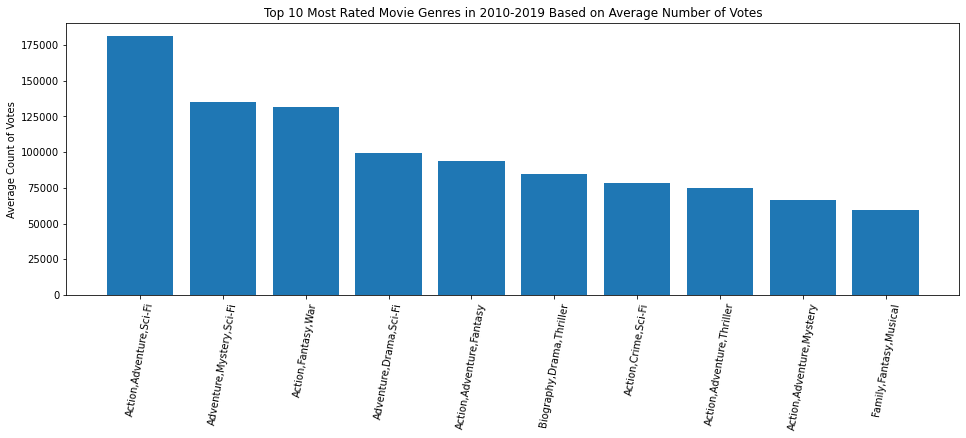

In [91]:
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_numvotes_mean.numvotes
top_10_numvotes_mean = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_numvotes_mean.index, top_10_numvotes_mean.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Average Count of Votes")
ax.set_title("Top 10 Most Rated Movie Genres in 2010-2019 Based on Average Number of Votes");

## RATING

## Question 4 & 5: Top 10 highest rated movies and genres during 2010-2019.

In [121]:
# Highest rated movies based on average rating 
imdb_df_over_100_votes.groupby(['primary_title','genres'], sort=False).max().\
sort_values('averagerating', ascending=False).head(10)

,,tconst,original_title,start_year,runtime_minutes,averagerating,numvotes
primary_title,genres,,,,,,
Gini Helida Kathe,Drama,tt9537008,Gini Helida Kathe,2019,138.000000,9.9,417
Eghantham,Drama,tt8718580,Eghantham,2018,125.000000,9.7,639
Once Upon a Time ... in Hollywood,"Comedy,Drama",tt7131622,Once Upon a Time ... in Hollywood,2019,159.000000,9.7,5600
Ekvtime: Man of God,"Biography,Drama,History",tt6058226,Ekvtime: Man of God,2018,132.000000,9.6,2604
Ananthu V/S Nusrath,"Comedy,Drama,Family",tt9343826,Ananthu V/S Nusrath,2018,149.000000,9.6,808
I Want to Live,"Adventure,Biography,Documentary",tt4131686,I Want to Live,2015,106.000000,9.6,1339
Yeh Suhaagraat Impossible,Comedy,tt9680166,Yeh Suhaagraat Impossible,2019,92.000000,9.6,624
D/O Parvathamma,Action,tt9760512,D/O Parvathamma,2019,86.187247,9.6,427
"Hare Krishna! The Mantra, the Movement and the Swami Who Started It All",Documentary,tt6842524,"Hare Krishna! The Mantra, the Movement and the...",2017,90.000000,9.5,829


In [122]:
#Highest rated genres based on overall average rating. 
imdb_highest_rated = imdb_title_raiting_basics_df.groupby(['genres'], sort=False).mean().\
sort_values('averagerating', ascending=False)
imdb_highest_rated.iloc[:10]

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Comedy,Documentary,Fantasy",2015.0,70.000000,9.4,5.0
"Documentary,Family,Musical",2017.0,59.000000,9.3,19.0
"History,Sport",2016.0,86.187247,9.2,5.0
"Music,Mystery",2012.0,86.187247,9.0,5.0
Game-Show,2013.0,130.000000,9.0,7.0
"Drama,Short",2018.0,18.000000,8.8,8.0
"Documentary,News,Sport",2017.0,85.000000,8.8,25.0
"Comedy,Drama,Reality-TV",2016.0,86.187247,8.8,15.0
"Drama,Fantasy,War",2016.0,86.187247,8.8,22.0


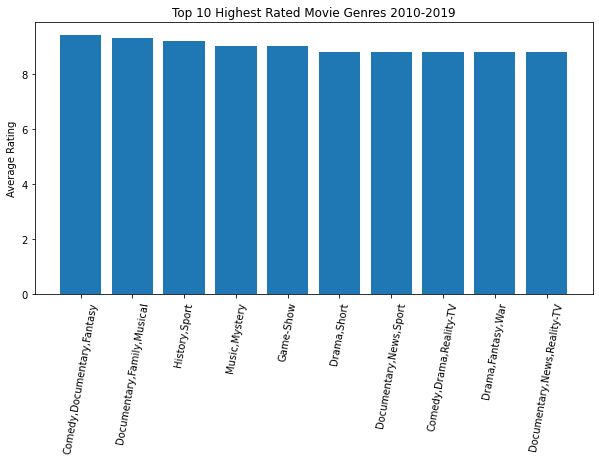

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create variables for easier reuse
value_counts = imdb_highest_rated.averagerating
top_10_highest_rating = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_highest_rating.index, top_10_highest_rating.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Average Rating")
ax.set_title("Top 10 Highest Rated Movie Genres 2010-2019");


## Question 6: Correlation between ratings and number of votes.

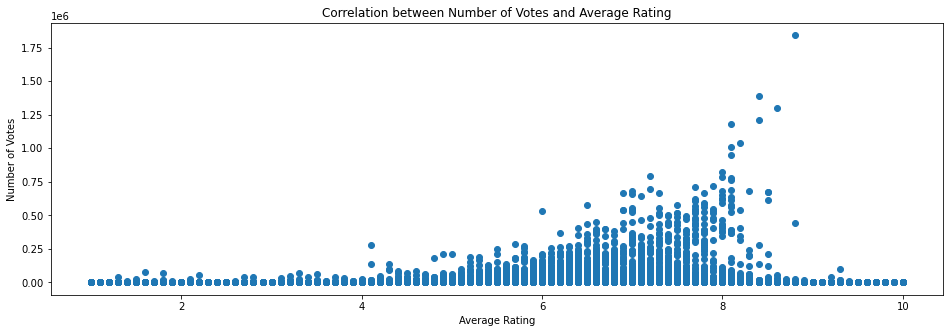

In [94]:
# Correlation between average rating and number of votes 
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_title_raiting_basics_df
#top_20_highest_rating = value_counts.iloc[:20]

# Plot data
ax.scatter(x = imdb_title_raiting_basics_df.averagerating, y = imdb_title_raiting_basics_df.numvotes)

# Customize appearance
ax.tick_params(axis="x", labelrotation=0)
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Votes")
ax.set_title("Correlation between Number of Votes and Average Rating");

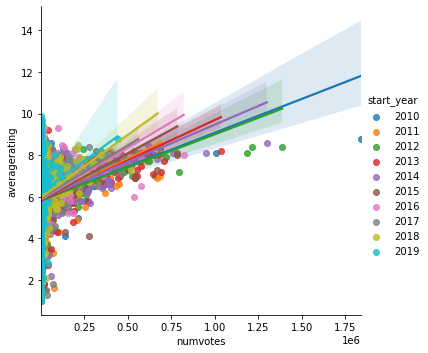

In [95]:
sns.lmplot(x="numvotes", y="averagerating", hue="start_year", data=imdb_df_over_100_votes);

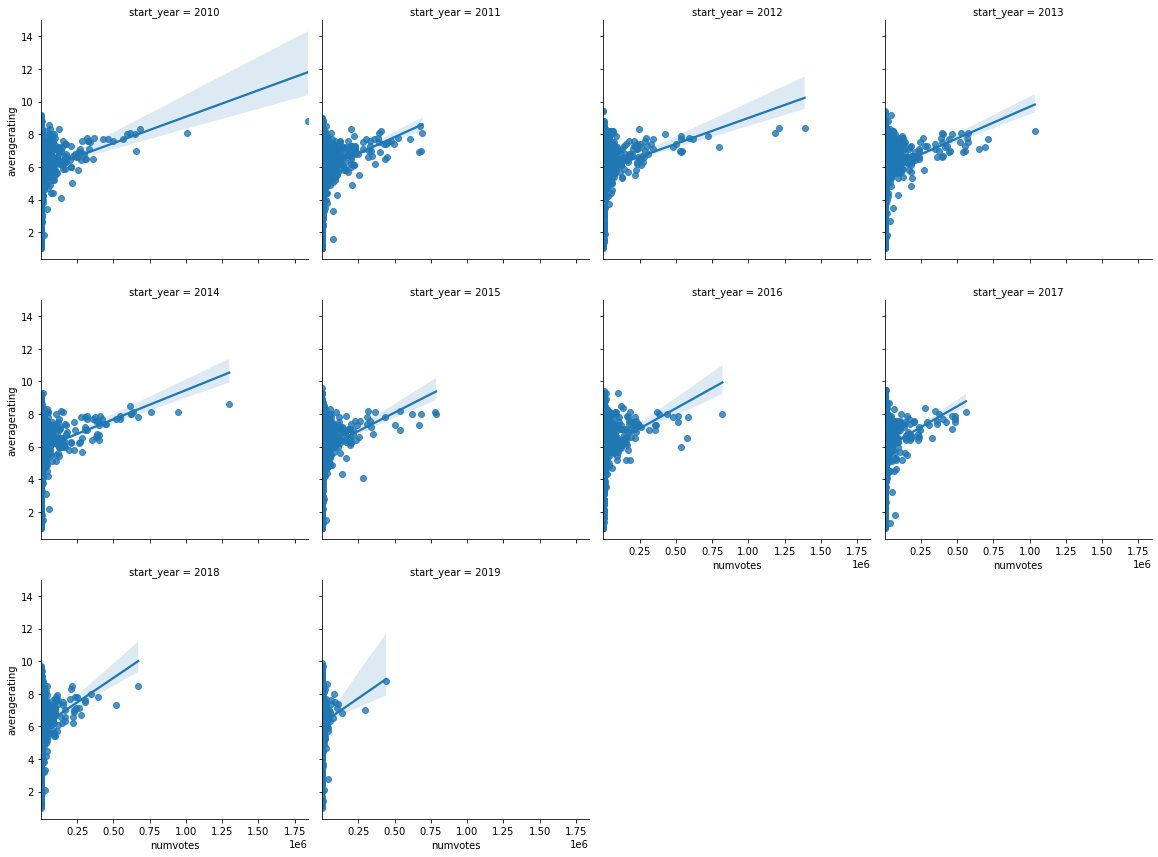

In [96]:
# Looking at correlation between number of votes and average rating per year.
sns.lmplot(x="numvotes", y="averagerating", col="start_year", data=imdb_df_over_100_votes,
           col_wrap=4, height=4);

In [97]:
# Pearson Correlation
imdb_df_over_100_votes.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.061923,0.035377,-0.045570
runtime_minutes,0.061923,1.000000,0.203341,0.124957
averagerating,0.035377,0.203341,1.000000,0.137544
numvotes,-0.045570,0.124957,0.137544,1.000000


### Conclusion on Question 6: 
***
Correlation between number of votes and average rating is 0.13. It is an indication there is little positive correlation between number of votes and average rating. That leads to a conclusion that number of votes and average rating will have different results and should be considered/reviewed separately. It is reassuring of our previous observation of top 10 genres by popularity ('num_votes') and rating ('averagerating') have different results. 
***

## GROSS INCOME AND ROI

## Gross Income and ROI
***
Questions 7-11: 
* Movies/genres with the highest domestic gross income.
* Movies/genres with the highest foreign gross income.
* Correlation between domestic and foreign gross income.
* Movies/genres with the highest ROI (return on investment).
***

### Question 7: Movies/genres with the highest domestic gross income.

In [98]:
imdb_title_raiting_budgets_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,45000000.0,41873330.0,73706.0,-41799624.0,-44926294.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,25000000.0,720828.0,9313302.0,8592474.0,-15686698.0
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,25000000.0,720828.0,9313302.0,8592474.0,-15686698.0
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,25000000.0,720828.0,9313302.0,8592474.0,-15686698.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,91000000.0,58236838.0,187861183.0,129624345.0,96861183.0


In [99]:
# Top 10 movies/genres with the highest domestic gross (based on max domestic gross results)
imdb_title_raiting_budgets_df.groupby(['primary_title', 'genres']).max().sort_values('domestic_gross', \
                                                                                     ascending=False).head(10)


,,tconst,original_title,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
primary_title,genres,,,,,,,,,,,
Avatar,Horror,tt1775309,Abatâ,2011,93.000000,6.1,43,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
Black Panther,"Action,Adventure,Sci-Fi",tt1825683,Black Panther,2018,134.000000,7.3,516148,200000000.0,700059566.0,1.348258e+09,6.481987e+08,1.148258e+09
Avengers: Infinity War,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,2018,149.000000,8.5,670926,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09
Titanic,Adventure,tt2495766,Titanic,2012,86.187247,6.2,20,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09
Jurassic World,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,2015,124.000000,7.0,539338,215000000.0,652270625.0,1.648855e+09,9.965842e+08,1.433855e+09
The Avengers,"Action,Adventure,Sci-Fi",tt0848228,The Avengers,2012,143.000000,8.1,1183655,225000000.0,623279547.0,1.517936e+09,8.946564e+08,1.292936e+09
Incredibles 2,"Action,Adventure,Animation",tt3606756,Incredibles 2,2018,118.000000,7.7,203510,200000000.0,608581744.0,1.242521e+09,6.339390e+08,1.042521e+09
Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",tt3748528,Rogue One,2016,133.000000,7.8,478592,200000000.0,532177324.0,1.049103e+09,5.169255e+08,8.491029e+08
Beauty and the Beast,"Drama,Fantasy,Romance",tt2316801,La belle et la bête,2014,112.000000,6.4,18100,160000000.0,504014165.0,1.259200e+09,7.551855e+08,1.099200e+09


In [100]:
# Top 10 genres with the highest domestic gross (based on highest average domestic gross results)
imdb_title_raiting_budgets_df.groupby(['genres']).mean().sort_values('domestic_gross', \
                                                                                     ascending=False).head(10)


,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
genres,,,,,,,,,
"Family,Fantasy,Musical",2017.000000,129.000000,7.200000,238325.000000,9.000000e+07,4.400357e+08,9.338154e+08,4.937797e+08,8.438154e+08
"Fantasy,Romance",2010.000000,92.000000,5.400000,75.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Adventure,Drama,Sport",2010.000000,93.000000,6.200000,62311.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Action,Adventure,Sci-Fi",2014.500000,126.862069,6.720690,399832.155172,1.606103e+08,2.217673e+08,6.022849e+08,3.805176e+08,4.416746e+08
"Adventure,Fantasy",2013.333333,139.666667,7.166667,375770.333333,2.316667e+08,1.928914e+08,7.012107e+08,5.083193e+08,4.695440e+08
"Fantasy,Musical",2010.000000,99.000000,6.500000,6.000000,1.015000e+08,1.880322e+08,5.584893e+08,3.704571e+08,4.569893e+08
"Comedy,Romance,Sci-Fi",2011.000000,116.000000,5.600000,1152.000000,6.500000e+07,1.828051e+08,3.741051e+08,1.913000e+08,3.091051e+08
"Biography,Documentary,History",2013.500000,77.000000,7.300000,2003.500000,9.025000e+07,1.810211e+08,4.299082e+08,2.488871e+08,3.396582e+08
"Biography,Drama,Musical",2017.000000,105.000000,7.600000,199663.000000,8.400000e+07,1.743402e+08,3.866656e+08,2.123254e+08,3.026656e+08


### Question 8: Movies/genres with the highest foreign gross income.

In [101]:
# Top 10 movies/genres with the highest foreign gross (based on max foreign gross results)
imdb_title_raiting_budgets_df.groupby(['primary_title', 'genres']).max().sort_values('foreign_gross', \
                                                                                     ascending=False).head(10)

,,tconst,original_title,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
primary_title,genres,,,,,,,,,,,
Avatar,Horror,tt1775309,Abatâ,2011,93.000000,6.1,43,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
Titanic,Adventure,tt2495766,Titanic,2012,86.187247,6.2,20,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09
Avengers: Infinity War,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,2018,149.000000,8.5,670926,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09
Furious 7,"Action,Crime,Thriller",tt2820852,Furious Seven,2015,137.000000,7.2,335074,190000000.0,353007020.0,1.518723e+09,1.165716e+09,1.328723e+09
The Fate of the Furious,"Action,Crime,Thriller",tt4630562,The Fate of the Furious,2017,136.000000,6.7,179774,250000000.0,225764765.0,1.234846e+09,1.009082e+09,9.848463e+08
Jurassic World,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,2015,124.000000,7.0,539338,215000000.0,652270625.0,1.648855e+09,9.965842e+08,1.433855e+09
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",tt2395427,Avengers: Age of Ultron,2015,141.000000,7.3,665594,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
The Avengers,"Action,Adventure,Sci-Fi",tt0848228,The Avengers,2012,143.000000,8.1,1183655,225000000.0,623279547.0,1.517936e+09,8.946564e+08,1.292936e+09
Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",tt4881806,Jurassic World: Fallen Kingdom,2018,128.000000,6.2,219125,170000000.0,417719760.0,1.305773e+09,8.880530e+08,1.135773e+09


In [102]:
# Top 10 genres with the highest foreign gross (based on highest average foreign gross results)
imdb_title_raiting_budgets_df.groupby(['genres']).mean().sort_values('foreign_gross', \
                                                                                     ascending=False).head(10)

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
genres,,,,,,,,,
"Adventure,Drama,Sport",2010.000000,93.000000,6.200000,62311.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Fantasy,Romance",2010.000000,92.000000,5.400000,75.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Adventure,Fantasy",2013.333333,139.666667,7.166667,375770.333333,2.316667e+08,1.928914e+08,7.012107e+08,5.083193e+08,4.695440e+08
"Family,Fantasy,Musical",2017.000000,129.000000,7.200000,238325.000000,9.000000e+07,4.400357e+08,9.338154e+08,4.937797e+08,8.438154e+08
"Action,Adventure,Sci-Fi",2014.500000,126.862069,6.720690,399832.155172,1.606103e+08,2.217673e+08,6.022849e+08,3.805176e+08,4.416746e+08
"Fantasy,Musical",2010.000000,99.000000,6.500000,6.000000,1.015000e+08,1.880322e+08,5.584893e+08,3.704571e+08,4.569893e+08
"Adventure,Drama,Sci-Fi",2015.666667,136.000000,6.566667,659859.666667,9.700000e+07,1.527750e+08,4.710461e+08,3.182711e+08,3.740461e+08
"Action,Adventure,Animation",2014.058824,100.294118,7.429412,180186.764706,1.151471e+08,1.567252e+08,4.374047e+08,2.806794e+08,3.222576e+08
"Adventure,Mystery,Sci-Fi",2012.000000,124.000000,7.000000,538720.000000,1.250000e+08,1.264771e+08,4.024483e+08,2.759712e+08,2.774483e+08


### Question 9: Movies/genres with the highest worldwide gross income

In [103]:
# Top 10 movies/genres with the highest worldwide gross (based on max worldwide gross results)
imdb_title_raiting_budgets_df.groupby(['primary_title', 'genres']).max().sort_values('worldwide_gross', \
                                                                                     ascending=False).head(10)

,,tconst,original_title,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
primary_title,genres,,,,,,,,,,,
Avatar,Horror,tt1775309,Abatâ,2011,93.000000,6.1,43,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
Titanic,Adventure,tt2495766,Titanic,2012,86.187247,6.2,20,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09
Avengers: Infinity War,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,2018,149.000000,8.5,670926,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09
Jurassic World,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,2015,124.000000,7.0,539338,215000000.0,652270625.0,1.648855e+09,9.965842e+08,1.433855e+09
Furious 7,"Action,Crime,Thriller",tt2820852,Furious Seven,2015,137.000000,7.2,335074,190000000.0,353007020.0,1.518723e+09,1.165716e+09,1.328723e+09
The Avengers,"Action,Adventure,Sci-Fi",tt0848228,The Avengers,2012,143.000000,8.1,1183655,225000000.0,623279547.0,1.517936e+09,8.946564e+08,1.292936e+09
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",tt2395427,Avengers: Age of Ultron,2015,141.000000,7.3,665594,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
Black Panther,"Action,Adventure,Sci-Fi",tt1825683,Black Panther,2018,134.000000,7.3,516148,200000000.0,700059566.0,1.348258e+09,6.481987e+08,1.148258e+09
Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",tt4881806,Jurassic World: Fallen Kingdom,2018,128.000000,6.2,219125,170000000.0,417719760.0,1.305773e+09,8.880530e+08,1.135773e+09


In [104]:
# Top 10 genres with the highest worldwide gross (based on highest average worldwide gross results)
imdb_title_raiting_budgets_df.groupby(['genres']).mean().sort_values('worldwide_gross', ascending=False).head(10)

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
genres,,,,,,,,,
"Fantasy,Romance",2010.000000,92.000000,5.400000,75.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Adventure,Drama,Sport",2010.000000,93.000000,6.200000,62311.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Family,Fantasy,Musical",2017.000000,129.000000,7.200000,238325.000000,9.000000e+07,4.400357e+08,9.338154e+08,4.937797e+08,8.438154e+08
"Adventure,Fantasy",2013.333333,139.666667,7.166667,375770.333333,2.316667e+08,1.928914e+08,7.012107e+08,5.083193e+08,4.695440e+08
"Action,Adventure,Sci-Fi",2014.500000,126.862069,6.720690,399832.155172,1.606103e+08,2.217673e+08,6.022849e+08,3.805176e+08,4.416746e+08
"Fantasy,Musical",2010.000000,99.000000,6.500000,6.000000,1.015000e+08,1.880322e+08,5.584893e+08,3.704571e+08,4.569893e+08
"Adventure,Drama,Sci-Fi",2015.666667,136.000000,6.566667,659859.666667,9.700000e+07,1.527750e+08,4.710461e+08,3.182711e+08,3.740461e+08
"Action,Adventure,Animation",2014.058824,100.294118,7.429412,180186.764706,1.151471e+08,1.567252e+08,4.374047e+08,2.806794e+08,3.222576e+08
"Biography,Documentary,History",2013.500000,77.000000,7.300000,2003.500000,9.025000e+07,1.810211e+08,4.299082e+08,2.488871e+08,3.396582e+08


In [118]:
# Top 10 movies/genres with the highest worldwide gross (based on max worldwide gross results) on the 2nd dataset:
imdb_title_raiting_basics_gross_df.groupby(['primary_title','genres']).max().sort_values('worldwide_gross', \
                                                                                     ascending=False).head(10)

tconst  \
primary_title                  genres                                  
Avengers: Age of Ultron        Action,Adventure,Sci-Fi     tt2395427   
Black Panther                  Action,Adventure,Sci-Fi     tt1825683   
Jurassic World: Fallen Kingdom Action,Adventure,Sci-Fi     tt4881806   
Frozen                         Adventure,Drama,Sport       tt1323045   
                               Adventure,Animation,Comedy  tt2294629   
Incredibles 2                  Action,Adventure,Animation  tt3606756   
Minions                        Adventure,Animation,Comedy  tt2293640   
Captain America: Civil War     Action,Adventure,Sci-Fi     tt3498820   
Aquaman                        Action,Adventure,Fantasy    tt1477834   
Transformers: Dark of the Moon Action,Adventure,Sci-Fi     tt1399103   

                                                                           original_title  \
primary_title                  genres                                                       
Avengers: Age of Ultron        Action,Adventure,Sci-Fi            Avengers: Age of Ultron   
Black Panther                  Action,Adventure,Sci-Fi                      Black Panther   
Jurassic World: Fallen Kingdom Action,Adventure,Sci-Fi     Jurassic World: Fallen Kingdom   
Frozen                         Adventure,Drama,Sport                               Frozen   
                               Adventure,Animation,Comedy                          Frozen   
Incredibles 2                  Action,Adventure,Animation                   Incredibles 2   
Minions                        Adventure,Animation,Comedy                         Minions   
Captain America: Civil War     Action,Adventure,Sci-Fi         Captain America: Civil War   
Aquaman                        Action,Adventure,Fantasy                           Aquaman   
Transformers: Dark of the Moon Action,Adventure,Sci-Fi     Transformers: Dark of the Moon   

                                                           start_year  \
primary_title                  genres                                   
Avengers: Age of Ultron        Action,Adventure,Sci-Fi           2015   
Black Panther                  Action,Adventure,Sci-Fi           2018   
Jurassic World: Fallen Kingdom Action,Adventure,Sci-Fi           2018   
Frozen                         Adventure,Drama,Sport             2010   
                               Adventure,Animation,Comedy        2013   
Incredibles 2                  Action,Adventure,Animation        2018   
Minions                        Adventure,Animation,Comedy        2015   
Captain America: Civil War     Action,Adventure,Sci-Fi           2016   
Aquaman                        Action,Adventure,Fantasy          2018   
Transformers: Dark of the Moon Action,Adventure,Sci-Fi           2011   

                                                           runtime_minutes  \
primary_title                  genres                                        
Avengers: Age of Ultron        Action,Adventure,Sci-Fi               141.0   
Black Panther                  Action,Adventure,Sci-Fi               134.0   
Jurassic World: Fallen Kingdom Action,Adventure,Sci-Fi               128.0   
Frozen                         Adventure,Drama,Sport                  93.0   
                               Adventure,Animation,Comedy            102.0   
Incredibles 2                  Action,Adventure,Animation            118.0   
Minions                        Adventure,Animation,Comedy             91.0   
Captain America: Civil War     Action,Adventure,Sci-Fi               147.0   
Aquaman                        Action,Adventure,Fantasy              143.0   
Transformers: Dark of the Moon Action,Adventure,Sci-Fi               154.0   

                                                           averagerating  \
primary_title                  genres                                      
Avengers: Age of Ultron        Action,Adventure,Sci-Fi               7.3   
Black Panther                  Action,

### Question 10: Correlation between domestic and foreign gross income.

In [105]:
# Pearson correlation
tn_movie_budgets.corr()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
id,1.000000,-0.035278,0.008928,-0.007026,-0.016029,0.001784
production_budget,-0.035278,1.000000,0.666334,0.734961,0.730533,0.588355
domestic_gross,0.008928,0.666334,1.000000,0.934386,0.838367,0.922266
worldwide_gross,-0.007026,0.734961,0.934386,1.000000,0.977559,0.980739
foreign_gross,-0.016029,0.730533,0.838367,0.977559,1.000000,0.955256
ROI,0.001784,0.588355,0.922266,0.980739,0.955256,1.000000


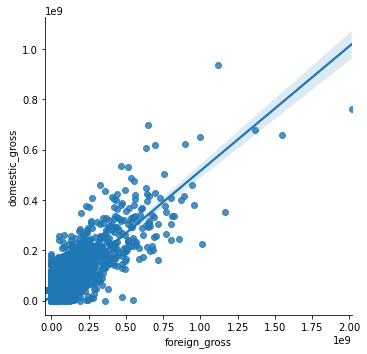

In [106]:
sns.lmplot(x="foreign_gross", y="domestic_gross", data=tn_movie_budgets);

In [107]:
# Since bom_movie_gross dataset also has foreign and domestic gross values, let's run Pearson's correlation \
# to check if we will be getting similar outcome as on tn_movie_budgets. 
bom_movie_gross_dropped_na.corr()

,domestic_gross,foreign_gross,year,worldwide_gross
domestic_gross,1.000000,0.767922,0.120770,0.904517
foreign_gross,0.767922,1.000000,0.142832,0.967751
year,0.120770,0.142832,1.000000,0.142585
worldwide_gross,0.904517,0.967751,0.142585,1.000000


### Conclusion of Question 10
***
By running Pearson's correlation on two datasets and Seaborn plot above, we can clearly see that there is a strong posiitive correlation not only between domestic and foreign gross, but also between domestic/foreign gross and worldwide gross, production budget and worldwide gross, ROI and domestic/foreign/worldwide gross. 
***

### Question 11: Movies/genres with the highest ROI (return on investment).

In [108]:
# Top 10 movies/genres with the highest ROI (based on max ROI results)
imdb_title_raiting_budgets_df.groupby(['primary_title', 'genres']).max().sort_values('ROI', \
                                                                                     ascending=False).head(10)

,,tconst,original_title,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
primary_title,genres,,,,,,,,,,,
Avatar,Horror,tt1775309,Abatâ,2011,93.000000,6.1,43,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
Titanic,Adventure,tt2495766,Titanic,2012,86.187247,6.2,20,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09
Avengers: Infinity War,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War,2018,149.000000,8.5,670926,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09
Jurassic World,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,2015,124.000000,7.0,539338,215000000.0,652270625.0,1.648855e+09,9.965842e+08,1.433855e+09
Furious 7,"Action,Crime,Thriller",tt2820852,Furious Seven,2015,137.000000,7.2,335074,190000000.0,353007020.0,1.518723e+09,1.165716e+09,1.328723e+09
The Avengers,"Action,Adventure,Sci-Fi",tt0848228,The Avengers,2012,143.000000,8.1,1183655,225000000.0,623279547.0,1.517936e+09,8.946564e+08,1.292936e+09
Black Panther,"Action,Adventure,Sci-Fi",tt1825683,Black Panther,2018,134.000000,7.3,516148,200000000.0,700059566.0,1.348258e+09,6.481987e+08,1.148258e+09
Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",tt4881806,Jurassic World: Fallen Kingdom,2018,128.000000,6.2,219125,170000000.0,417719760.0,1.305773e+09,8.880530e+08,1.135773e+09
Frozen,"Fantasy,Romance",tt1611845,Wai nei chung ching,2010,92.000000,5.4,75,150000000.0,400738009.0,1.272470e+09,8.717319e+08,1.122470e+09


In [109]:
# Top 10 genres with the highest ROI (based on highest average ROI results)
imdb_title_raiting_budgets_df.groupby(['genres']).mean().sort_values('ROI', \
                                                                                     ascending=False).head(10)

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,foreign_gross,ROI
genres,,,,,,,,,
"Adventure,Drama,Sport",2010.000000,93.000000,6.200000,62311.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Fantasy,Romance",2010.000000,92.000000,5.400000,75.000000,1.500000e+08,4.007380e+08,1.272470e+09,8.717319e+08,1.122470e+09
"Family,Fantasy,Musical",2017.000000,129.000000,7.200000,238325.000000,9.000000e+07,4.400357e+08,9.338154e+08,4.937797e+08,8.438154e+08
"Adventure,Fantasy",2013.333333,139.666667,7.166667,375770.333333,2.316667e+08,1.928914e+08,7.012107e+08,5.083193e+08,4.695440e+08
"Fantasy,Musical",2010.000000,99.000000,6.500000,6.000000,1.015000e+08,1.880322e+08,5.584893e+08,3.704571e+08,4.569893e+08
"Action,Adventure,Sci-Fi",2014.500000,126.862069,6.720690,399832.155172,1.606103e+08,2.217673e+08,6.022849e+08,3.805176e+08,4.416746e+08
"Adventure,Drama,Sci-Fi",2015.666667,136.000000,6.566667,659859.666667,9.700000e+07,1.527750e+08,4.710461e+08,3.182711e+08,3.740461e+08
"Drama,Family,Fantasy",2015.000000,105.000000,6.900000,142792.000000,4.895000e+07,1.430757e+08,3.990714e+08,2.559957e+08,3.501214e+08
"Biography,Documentary,History",2013.500000,77.000000,7.300000,2003.500000,9.025000e+07,1.810211e+08,4.299082e+08,2.488871e+08,3.396582e+08


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Comparison of Top Rated Genres:

|--| Produced              | Popularity                 | Rating                     |
|--| :-------------        |:-------------              | :----                      |
|1 | Documentary           | Action,Adventure,Sci-Fi    | Comedy,Documentary,Fantasy |
|2 | Drama                 | Adventure,Mystery,Sci-Fi   | Documentary,Family,Musical |
|3 | Comedy                | Action,Fantasy,War         | History,Sport              |
|4 | Horror                | Adventure,Drama,Sci-Fi	    | Music,Mystery              |
|5 | Comedy,Drama          | Action,Adventure,Fantasy   | Game-Show                  |
|6 | Thriller              | Biography,Drama, Thriller  | Drama,Short                |
|7 | Action                | Action, Crime, Sci-Fi      | Documentary,News,Sport     |
|8 | Biography, Documentary| Action, Adventure, Thriller| Comedy,Drama,Reality-TV    |
|9 | Drama, Romance        | Action, Adventure, Mystery | Drama,Fantasy,War          |
|10| Comedy,Drama, Romance | Family, Fantasy, Musical   | Documentary,News,Reality-TV|

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***